In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [6]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)



print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


Dataset shape: (10000, 14)

First 5 rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  


# Data Overview & Quality Check

In [8]:

print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())


print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])


print(f"\nDuplicates: {df.duplicated().sum()}")


print(f"\nChurn Rate: {df['Exited'].mean():.2%}")
print(df['Exited'].value_counts(normalize=True))


print("\nData Quality Checks:")
print("Age range:", df['Age'].min(), "-", df['Age'].max())
print("CreditScore range:", df['CreditScore'].min(), "-", df['CreditScore'].max())
print("Balance range:", df['Balance'].min(), "-", df['Balance'].max())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Dataset Description:
         RowNumber    CustomerId   CreditScore       

# Univariate Analysis - All Features

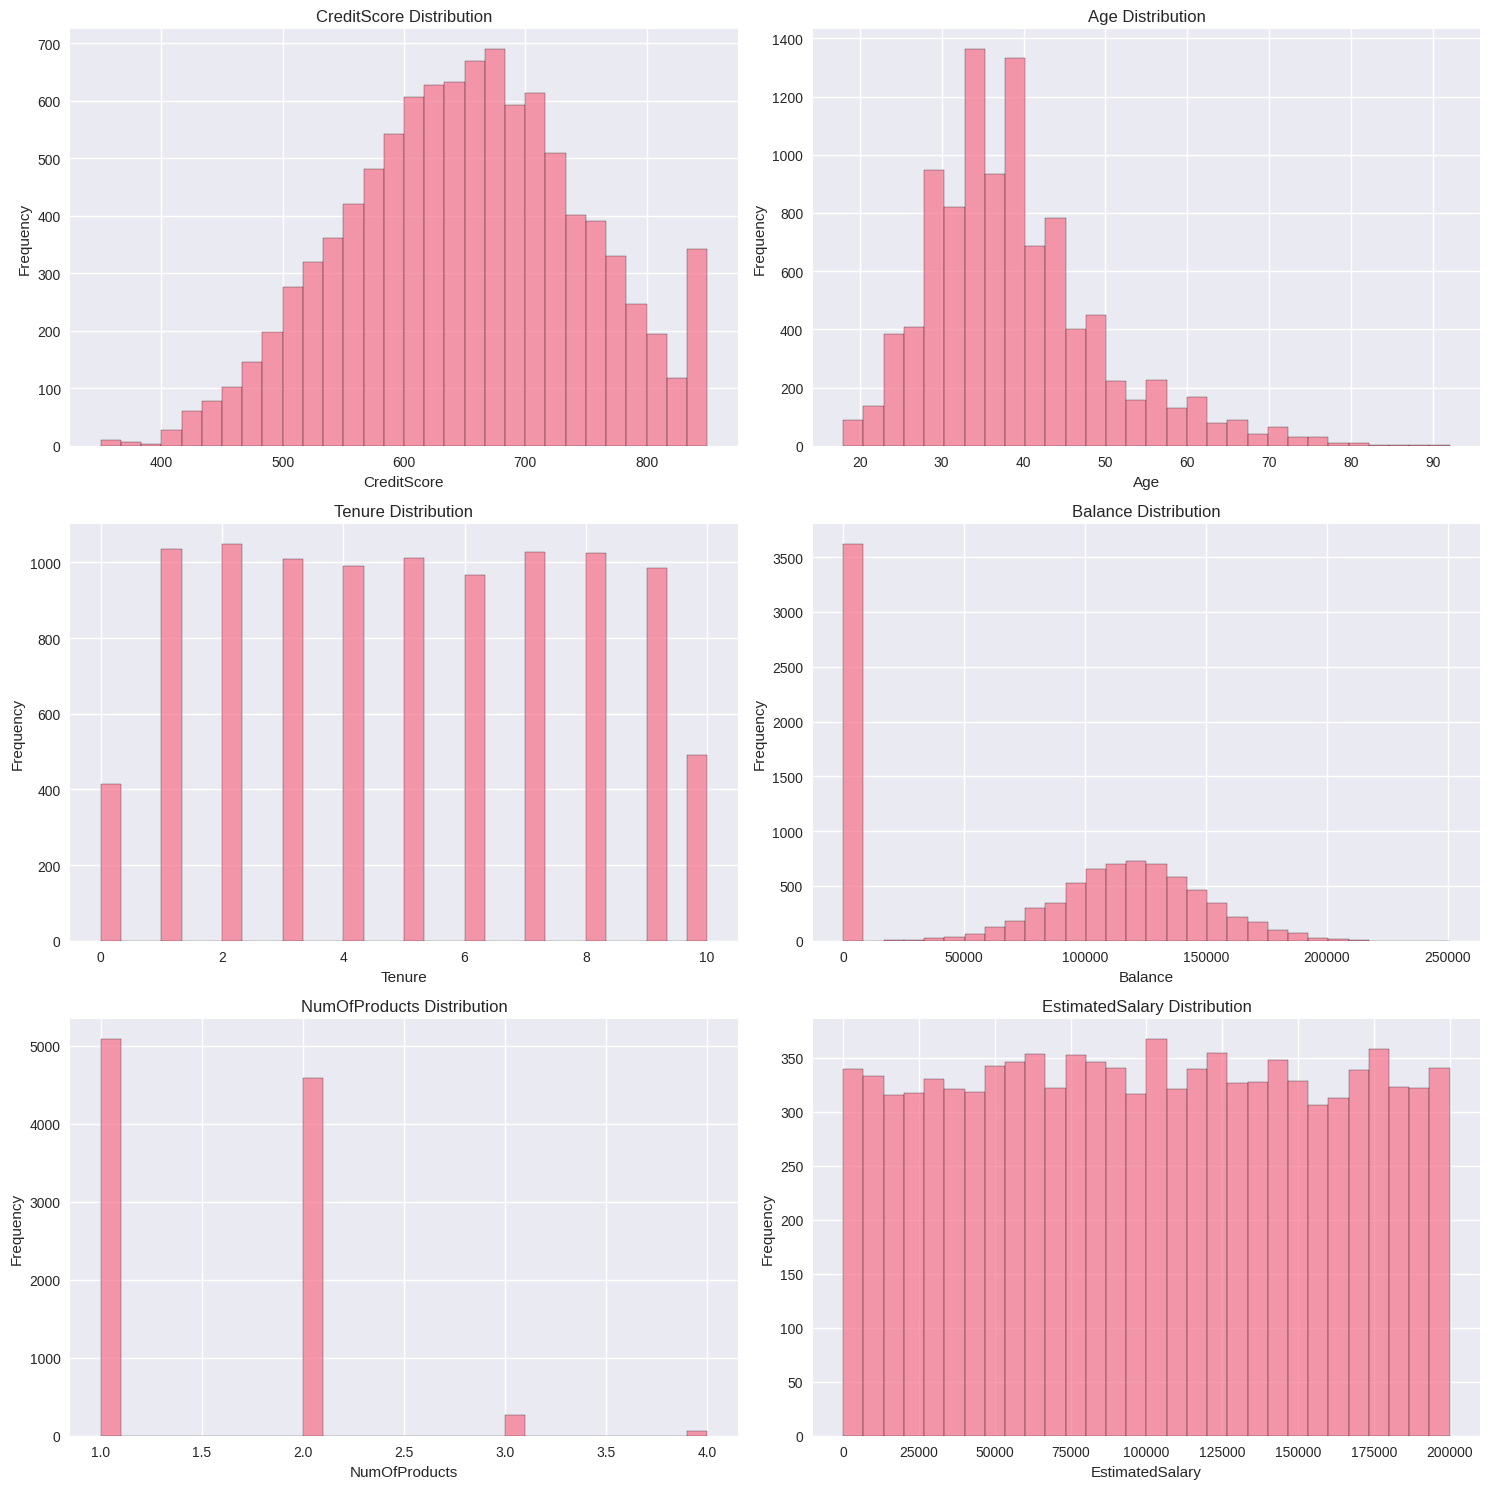

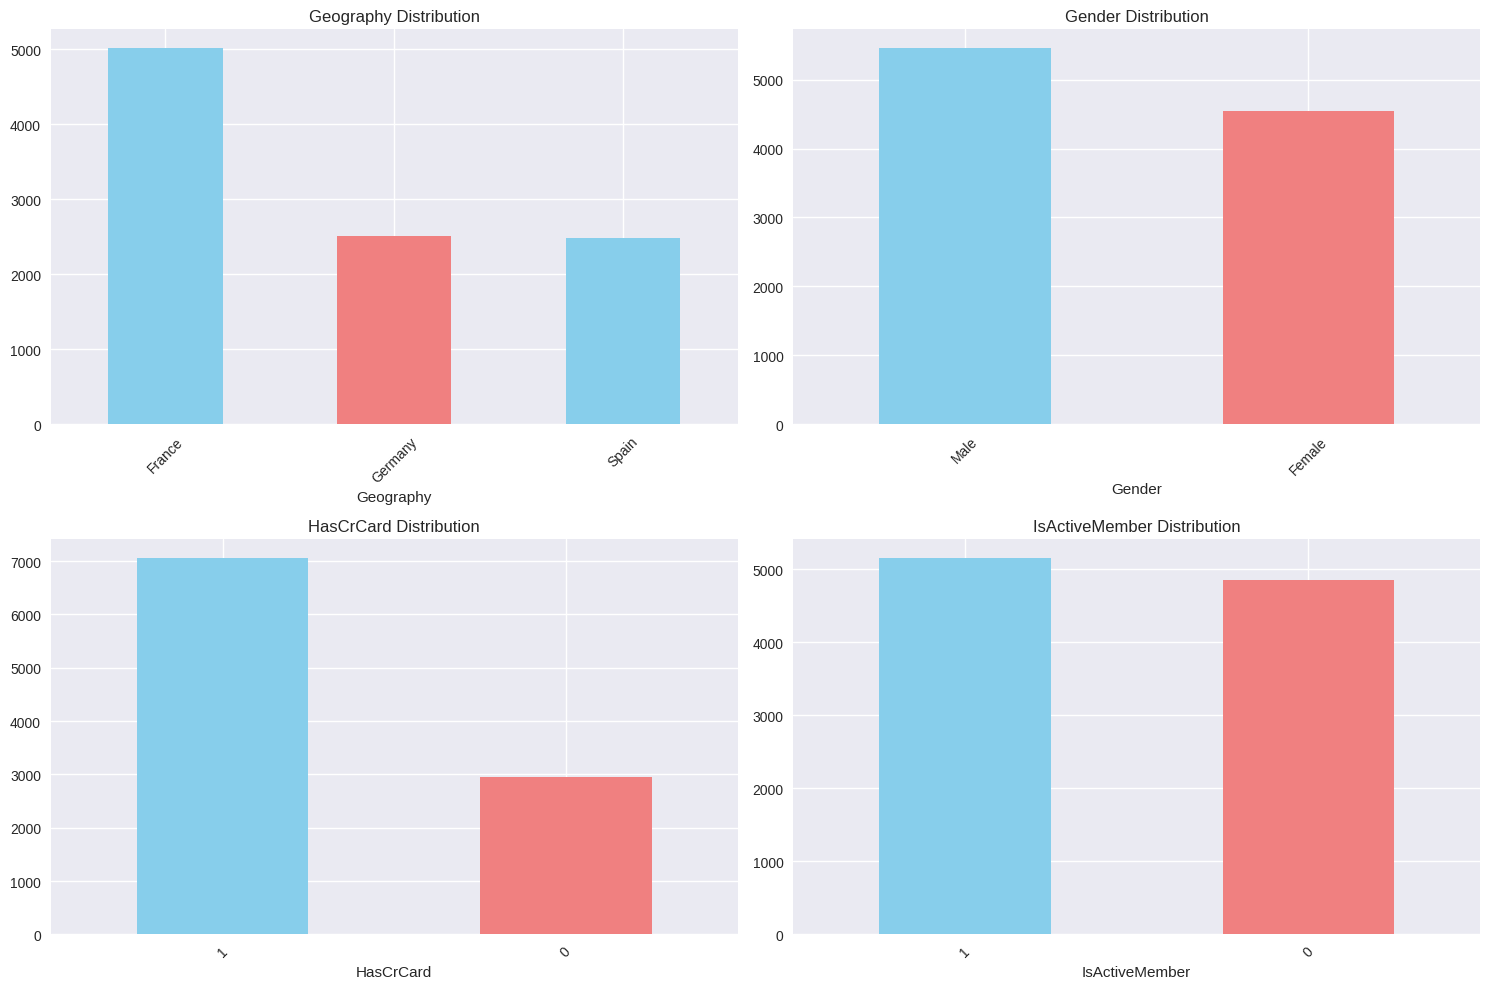

In [9]:

num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, col in enumerate(num_features):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Categorical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(cat_features):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], color=['skyblue', 'lightcoral'])
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


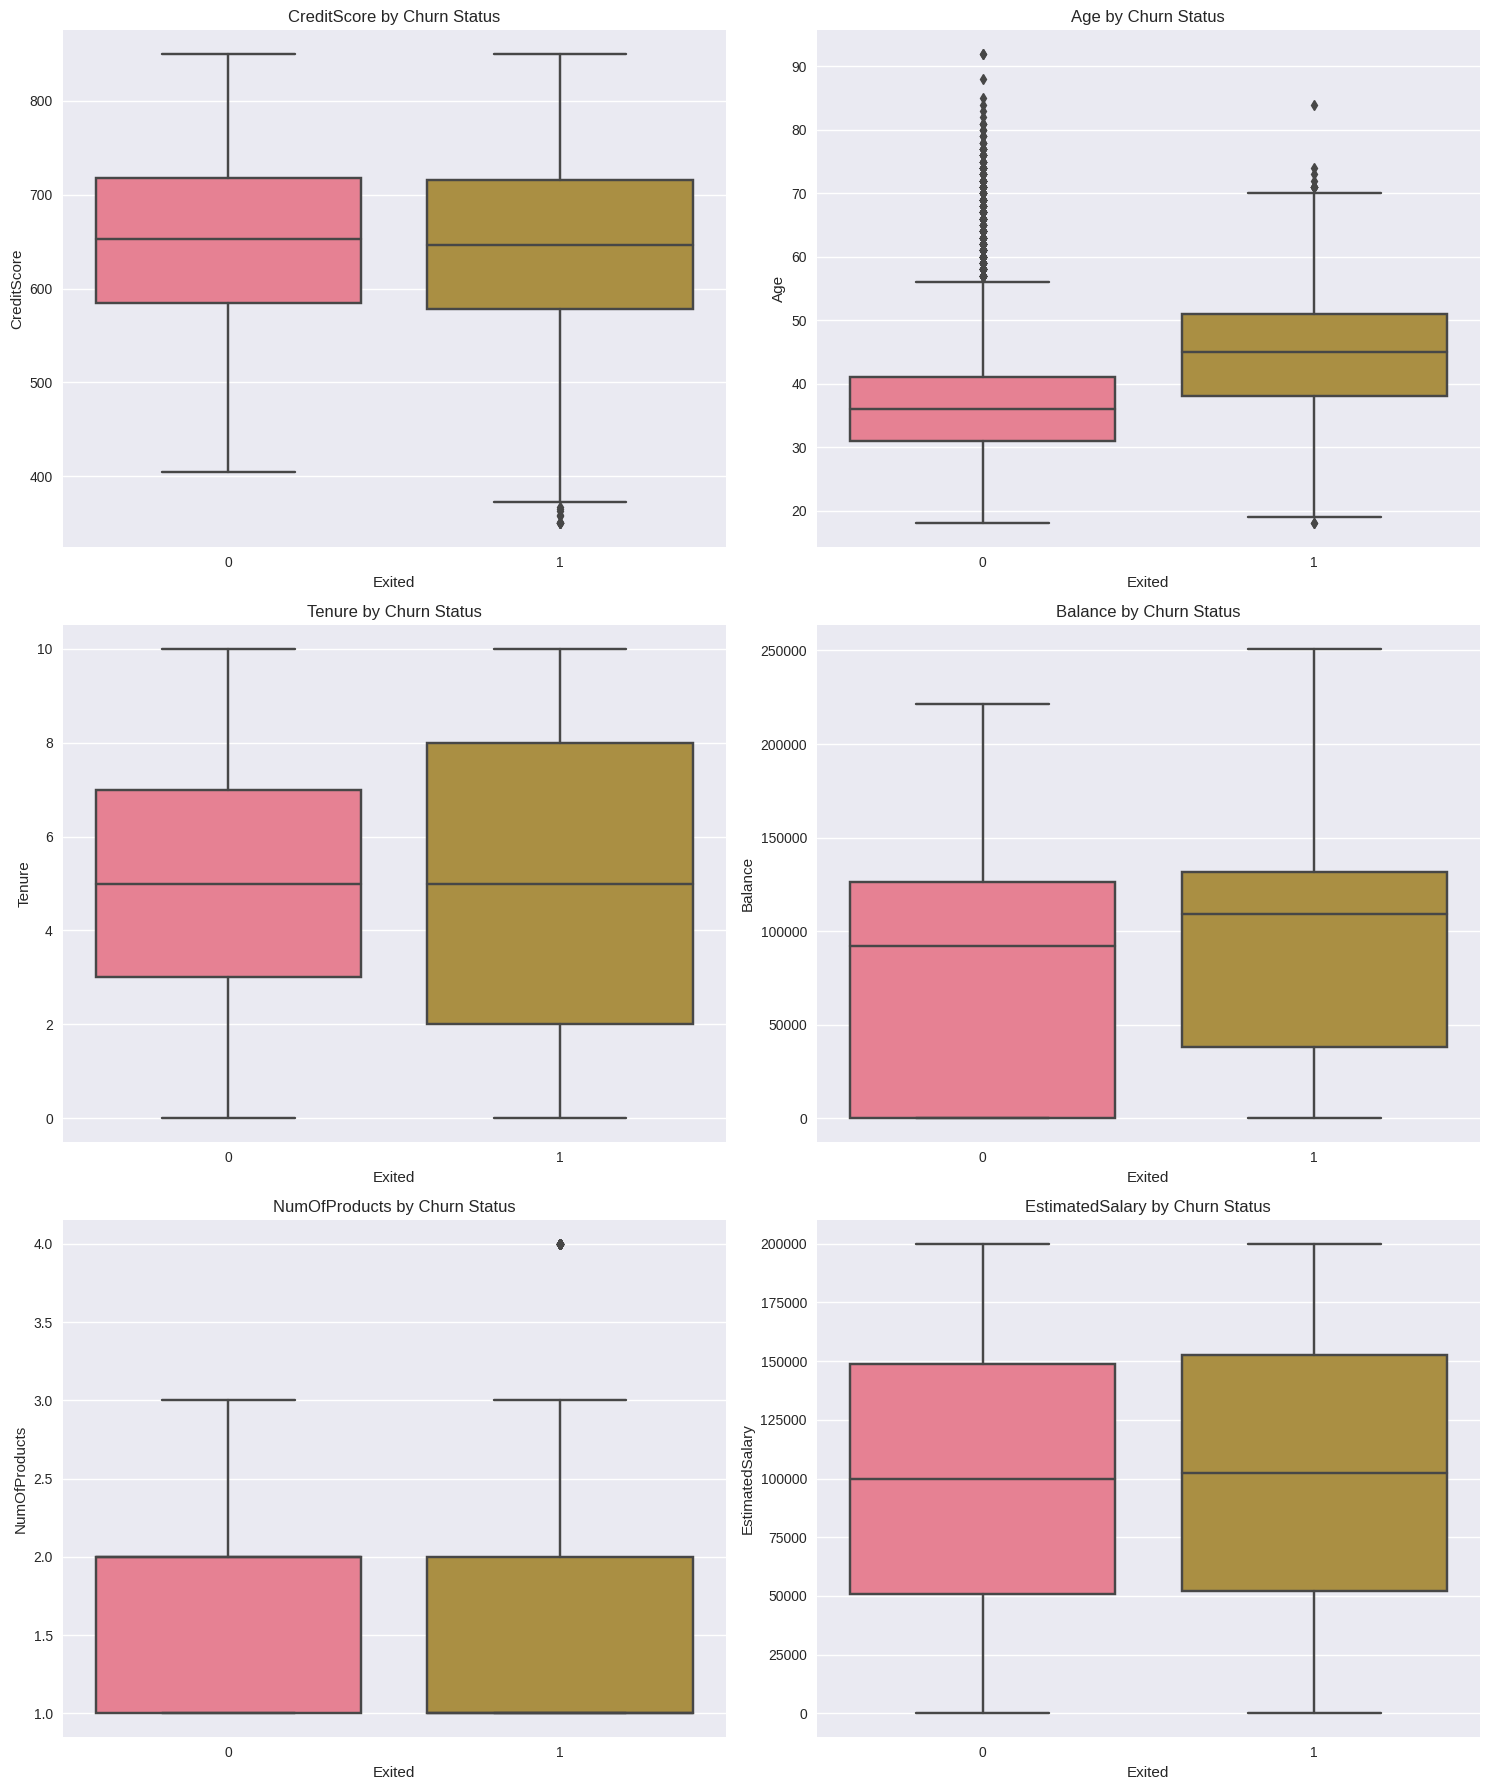

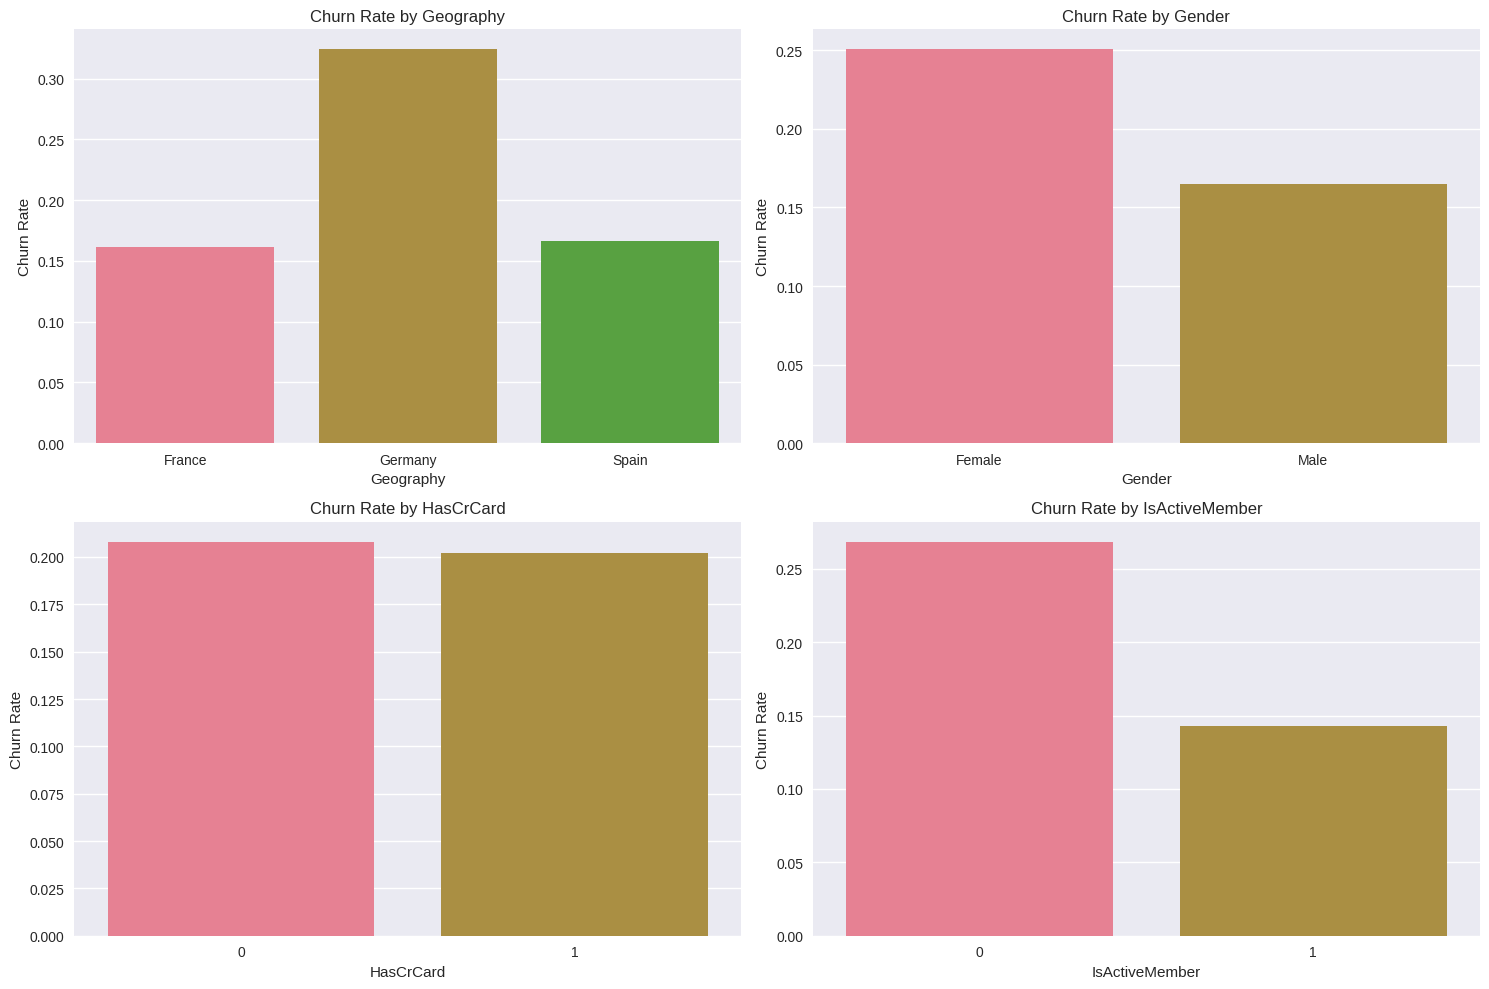

In [10]:
# Numerical vs Churn (Boxplots)
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(num_features):
    sns.boxplot(data=df, x='Exited', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn Status')

plt.tight_layout()
plt.show()

# Categorical vs Churn (Churn rates)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(cat_features):
    churn_rate = df.groupby(col)['Exited'].mean()
    sns.barplot(x=churn_rate.index, y=churn_rate.values, ax=axes[idx])
    axes[idx].set_title(f'Churn Rate by {col}')
    axes[idx].set_ylabel('Churn Rate')

plt.tight_layout()
plt.show()


# Correlation & Feature Relationships

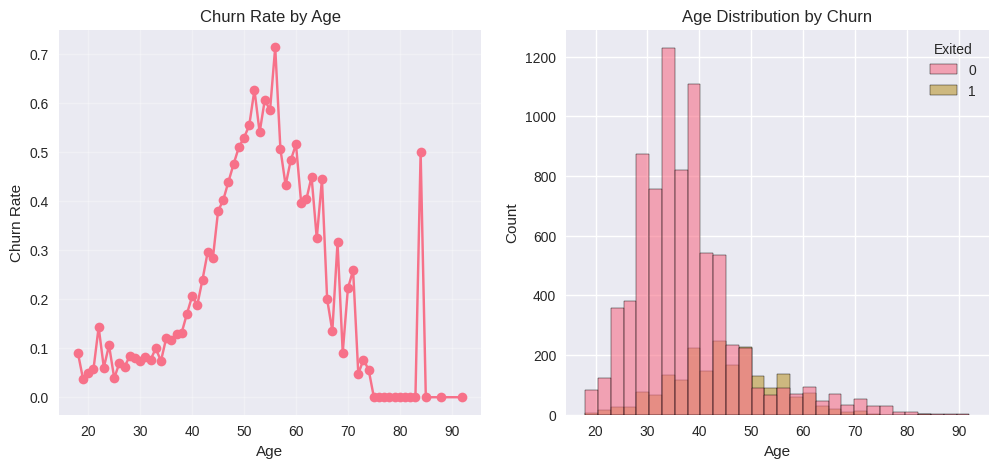

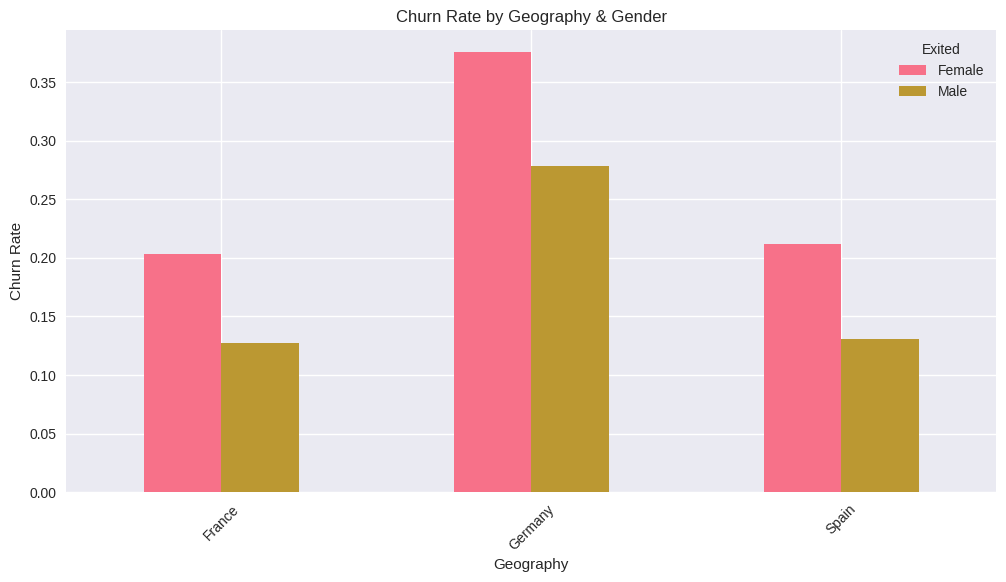

In [11]:
#  Age vs Churn 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
age_churn = df.groupby('Age')['Exited'].mean()
plt.plot(age_churn.index, age_churn.values, marker='o')
plt.title('Churn Rate by Age')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Age', hue='Exited', bins=30, alpha=0.6)
plt.title('Age Distribution by Churn')
plt.show()

# Geography & Gender interaction
pd.crosstab(df['Geography'], df['Gender'], df['Exited'], aggfunc='mean').plot(kind='bar', figsize=(12, 6))
plt.title('Churn Rate by Geography & Gender')
plt.ylabel('Churn Rate')
plt.legend(title='Exited')
plt.xticks(rotation=45)
plt.show()


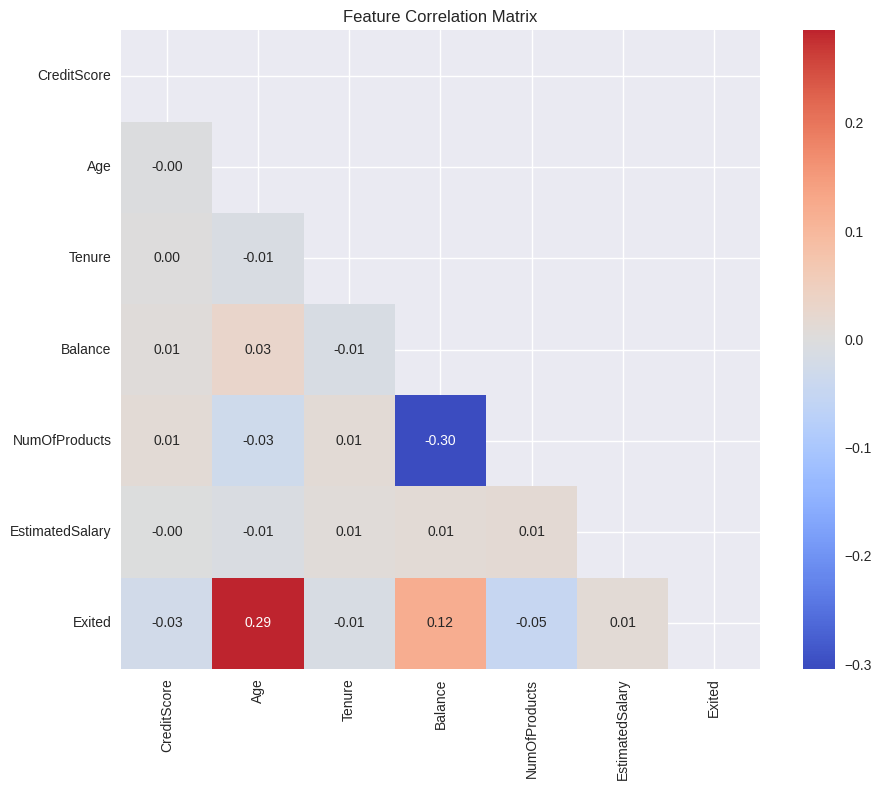

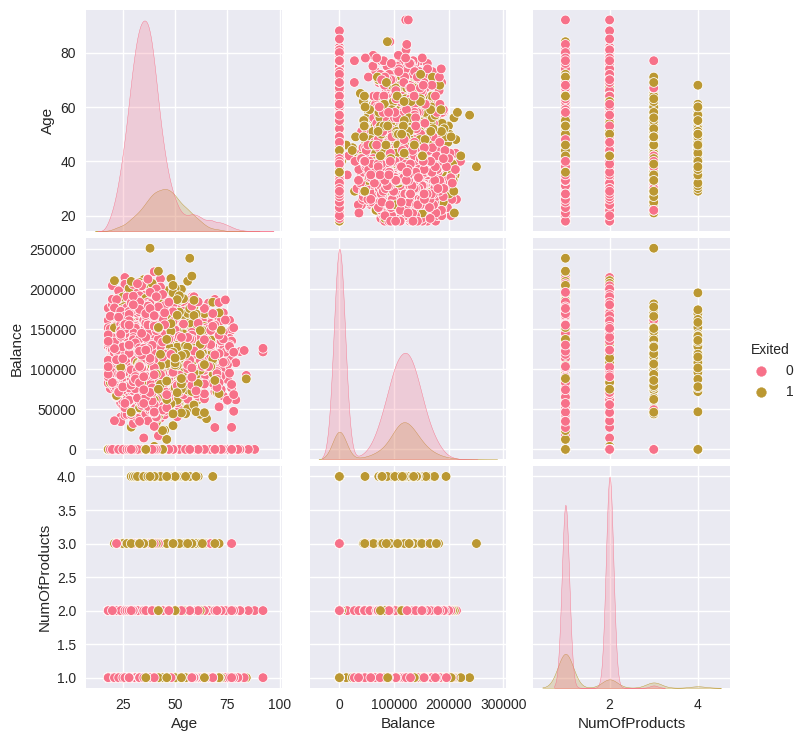

In [12]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[num_features + ['Exited']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Pairplot (sample for key features)
sns.pairplot(df[['Age', 'Balance', 'NumOfProducts', 'Exited']], hue='Exited')
plt.show()


# Outlier Checking

In [13]:
#  outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return len(outliers), lower, upper

outliers_summary = {}
for col in num_features:
    n_outliers, lower, upper = detect_outliers(df, col)
    outliers_summary[col] = {'outliers': n_outliers, 'lower': lower, 'upper': upper}
    print(f"{col}: {n_outliers} outliers ({n_outliers/len(df)*100:.1f}%)")

outliers_df = pd.DataFrame(outliers_summary).T
print("\nOutlier Summary:")
print(outliers_df)


CreditScore: 15 outliers (0.1%)
Age: 359 outliers (3.6%)
Tenure: 0 outliers (0.0%)
Balance: 0 outliers (0.0%)
NumOfProducts: 60 outliers (0.6%)
EstimatedSalary: 0 outliers (0.0%)

Outlier Summary:
                 outliers         lower         upper
CreditScore          15.0     383.00000     919.00000
Age                 359.0      14.00000      62.00000
Tenure                0.0      -3.00000      13.00000
Balance               0.0 -191466.36000  319110.60000
NumOfProducts        60.0      -0.50000       3.50000
EstimatedSalary       0.0  -96577.09625  296967.45375


# Handling Outlier

In [14]:

# Create cleaned dataset
df_cleaned = df.copy()

# 1. CreditScore (0.1% - minor, cap them)
n_out, lower_cs, upper_cs = detect_outliers(df, 'CreditScore')
df_cleaned['CreditScore'] = df_cleaned['CreditScore'].clip(lower=lower_cs, upper=upper_cs)
print(f"✅ CreditScore: Capped {n_out} outliers")

# 2. Age (3.6% - CRITICAL - winsorize to 1st/99th percentile)
age_lower = df['Age'].quantile(0.01)  # 1st percentile
age_upper = df['Age'].quantile(0.99)  # 99th percentile
df_cleaned['Age'] = df_cleaned['Age'].clip(lower=age_lower, upper=age_upper)
print(f"✅ Age: Winsorized to [{age_lower:.0f}, {age_upper:.0f}] (was {lower:.0f}-{upper:.0f})")

# 3. NumOfProducts (0.6% - likely 4+ products, cap at 4)
df_cleaned['NumOfProducts'] = df_cleaned['NumOfProducts'].clip(upper=4)
print(f"✅ NumOfProducts: Capped at 4")

print("\n✅ OUTLIER HANDLING COMPLETE!")
print("Updated outlier check:")
for col in ['CreditScore', 'Age', 'NumOfProducts']:
    n_out, _, _ = detect_outliers(df_cleaned, col)
    print(f"{col}: {n_out} outliers ({n_out/len(df)*100:.1f}%)")


✅ CreditScore: Capped 15 outliers
✅ Age: Winsorized to [21, 72] (was -96577-296967)
✅ NumOfProducts: Capped at 4

✅ OUTLIER HANDLING COMPLETE!
Updated outlier check:
CreditScore: 0 outliers (0.0%)
Age: 359 outliers (3.6%)
NumOfProducts: 60 outliers (0.6%)


# Feature Engineering

In [15]:

# SAFE Feature Engineering (NaN-proof)
df_cleaned['BalancePerProduct'] = df_cleaned['Balance'] / (df_cleaned['NumOfProducts'] + 1)
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=5, labels=[0,1,2,3,4])
df_cleaned['InactiveHighBalance'] = ((df_cleaned['IsActiveMember'] == 0) & (df_cleaned['Balance'] > 100000)).astype(int)

#  Fill ALL NaN with 0
df_cleaned = df_cleaned.fillna(0)

print(" Features added + NaN fixed!")


 Features added + NaN fixed!


# Handling Nan Value

In [16]:
from sklearn.preprocessing import LabelEncoder
df_cleaned = df_cleaned.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1, errors='ignore')
df_cleaned['Geography'] = LabelEncoder().fit_transform(df_cleaned['Geography'])
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Female': 0, 'Male': 1}).fillna(0)

# FINAL CLEANUP
X = df_cleaned.drop('Exited', axis=1).fillna(0)  
y = df_cleaned['Exited'].fillna(0).values

print(f"Clean shape: {X.shape}")
print("Any NaN left?", X.isnull().sum().sum())  


Clean shape: (10000, 13)
Any NaN left? 0


# Model Training

In [17]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split + Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)




Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8011 - loss: 0.5003 - val_accuracy: 0.8275 - val_loss: 0.4193
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8305 - loss: 0.4061 - val_accuracy: 0.8519 - val_loss: 0.3840
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 0.3793 - val_accuracy: 0.8656 - val_loss: 0.3545
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.3443 - val_accuracy: 0.8656 - val_loss: 0.3432
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3384 - val_accuracy: 0.8681 - val_loss: 0.3416
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.3482 - val_accuracy: 0.8700 - val_loss: 0.3392
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.3525 - val_accuracy: 0.8687 - val_loss: 0.3407
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3167 - val_accuracy: 0.

# Accuracy & Roc-AUC

 SUCCESS!
✅ ROC-AUC: 0.8059
✅ Accuracy: 0.8315


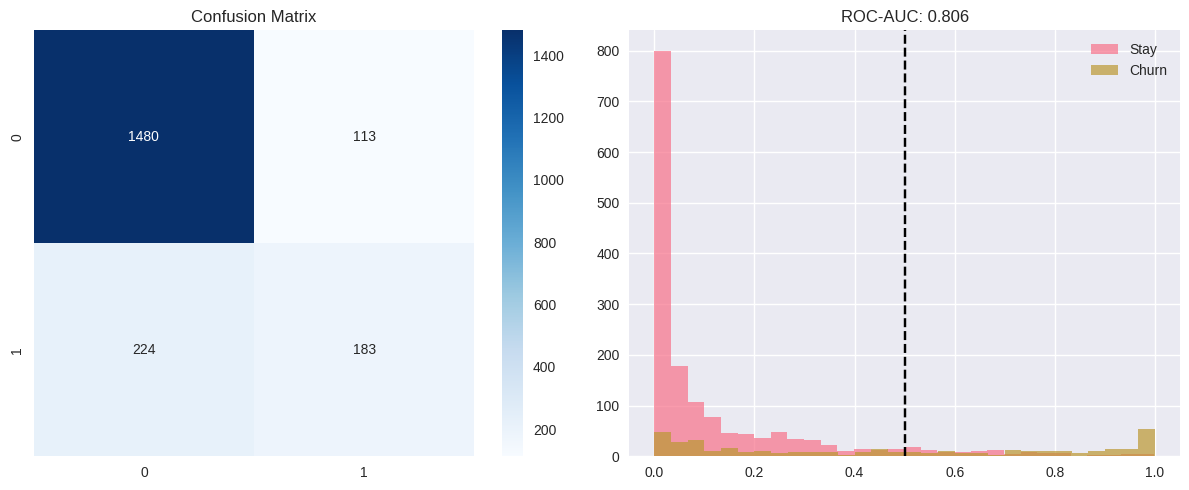

In [18]:
# Results
y_pred = model.predict(X_test, verbose=0).flatten()
y_pred_class = (y_pred > 0.5).astype(int)

roc = roc_auc_score(y_test, y_pred)
print(f" SUCCESS!")
print(f"✅ ROC-AUC: {roc:.4f}")
print(f"✅ Accuracy: {model.evaluate(X_test, y_test, verbose=0)[1]:.4f}")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')

ax2.hist(y_pred[y_test==0], bins=30, alpha=0.7, label='Stay')
ax2.hist(y_pred[y_test==1], bins=30, alpha=0.7, label='Churn')
ax2.axvline(0.5, color='black', linestyle='--')
ax2.legend()
ax2.set_title(f'ROC-AUC: {roc:.3f}')

plt.tight_layout()
plt.show()

In [20]:
import joblib
from sklearn.preprocessing import LabelEncoder


le_geo = LabelEncoder()
le_geo.fit(df_cleaned['Geography'])  

pipeline = {
    'model': model,
    'scaler': scaler,
    'feature_names': X.columns.tolist(),
    'le_geo': le_geo,           # ✅ MISSING tha ye!
    'target_encoder': LabelEncoder().fit(y)
}

joblib.dump(pipeline, 'churn_model_pipeline.pkl')
print("✅ FULL PIPELINE SAVED!")
print("Contains: model + scaler + le_geo + features")


✅ FULL PIPELINE SAVED!
Contains: model + scaler + le_geo + features
